## Gán đa biến chuỗi các phương trình (MICE)

Trong notebook này, chúng ta sẽ triển khai MICE sử dụng nhiều mô hình học máy khác nhau để ước tính các giá trị bị khuyết.

[IterativeImputer từ Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer)

- Mô hình tương tự được dùng để dự đoán NA trong tất cả các biến.
- Không thể sử dụng phân loại cho các biến nhị phân và hồi quy cho các biến liên tục.

Chúng ta sẽ tập hợp các imputer/mô hình cách thủ công cho phép gán phức tạp hơn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings
warnings.filterwarnings('ignore')

## Load dữ liệu

In [2]:
data_path = 'D:\\FUNix\\04. Machine Learning\\04.2. MLP302x - Regresssion\\dataset'

In [3]:
# load dữ liệu với các biến dạng số

variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'A16']

data = pd.read_csv(data_path + '/creditApprovalUCI.csv', usecols=variables)

data.head()

,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,202.0,0,1
1,58.67,4.460,3.04,6,43.0,560,1
2,24.50,NaN,NaN,0,280.0,824,1
3,27.83,1.540,3.75,5,100.0,3,1
4,20.17,5.625,1.71,0,120.0,0,1


In [4]:
# chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [5]:
# tìm % dữ liệu bị khuyết trong các biến đó

X_train.isnull().mean()

A2     0.022774
A3     0.140787
A8     0.140787
A11    0.000000
A14    0.014493
A15    0.000000
dtype: float64

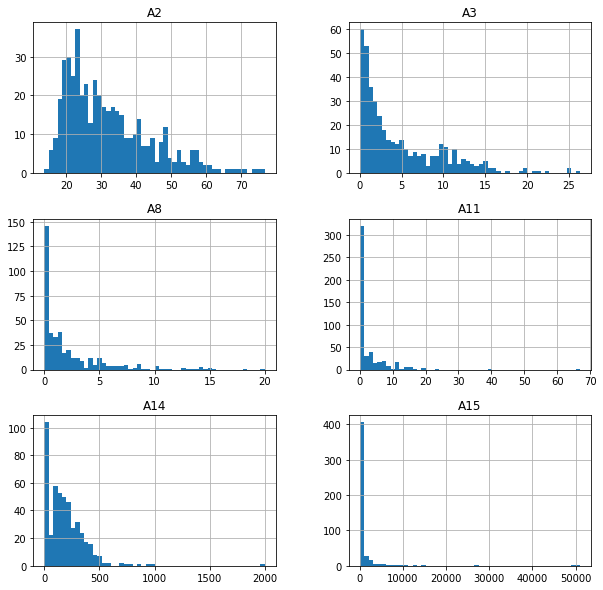

In [6]:
X_train.hist(bins=50, figsize=(10,10))
plt.show()

Trong tập dữ liệu này, hầu hết các biến là biến liên tục nên chúng ta có thể dễ dàng ước tính các giá trị bị khuyết với mô hình hồi quy sử dụng MICE.

In [8]:
## Yêu cầu 1: tạo một MICE imputer sử dụng Bayes làm bộ ước tính

## VIẾT CODE Ở ĐÂY:
imputer = IterativeImputer(
    estimator=BayesianRidge(), # bộ ước tính dự đoán NA 
    initial_strategy='mean', # cách NA được gán trong bước 1
    max_iter=10, # số chu kỳ
    imputation_order='ascending', # để gán các biến
    n_nearest_features=None, # liệu có giới hạn số yếu tố dự báo
    skip_complete=True, # liệu có bỏ qua các biến không có NA
    random_state=0,
)

<details><summary> Gợi ý </summary>

[IterativeImputer()](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)

</details>

In [9]:
## Yêu cầu 2
# thực hiện MICE
## VIẾT CODE Ở ĐÂY:
imputer.fit(X_train)

IterativeImputer(estimator=BayesianRidge(), random_state=0, skip_complete=True)

In [10]:
## Yêu cầu 3: biến đổi dữ liệu - thay các giá trị bị khuyết
## VIẾT CODE Ở ĐÂY:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [11]:
# không còn dữ liệu bị khuyết sau khi gán

pd.DataFrame(train_t, columns=X_train.columns).isnull().sum()

A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
dtype: int64

## So sánh phép gán với các mô hình khác

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [14]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0)

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=5),
    max_iter=10,
    random_state=0)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
    max_iter=10,
    random_state=0)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0)

In [16]:
## Yêu cầu 4
## VIẾT CODE Ở ĐÂY:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 random_state=0)

In [17]:
## Yêu cầu 5
# thay NA
## VIẾT CODE Ở ĐÂY:
X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

In [18]:
predictors = [var for var in variables if var !='A16']

In [19]:
# biến đổi mảng numpy thành dataframe
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

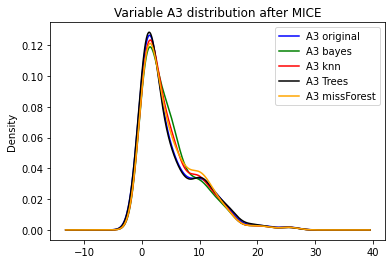

In [20]:
# vẽ biểu đồ phân phối của biến đã gán

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_bayes['A3'].plot(kind='kde', ax=ax, color='green')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['A3'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['A3'].plot(kind='kde', ax=ax, color='orange')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 bayes', 'A3 knn', 'A3 Trees', 'A3 missForest']
ax.legend(lines, labels, loc='best')
plt.title('Variable A3 distribution after MICE')
plt.show()

===================================End=============================